<a href="https://colab.research.google.com/github/NemesisCrociata/Production-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Nemesis Crociata
## Project Overview
- An overview of products and outlets for our client, a major grocer retailer, that play crucial roles in increasing sales.

## Load and Inspect Data

In [1]:
# Relevant packages are imported.

import pandas as pd
import numpy as np
import missingno as msno

In [2]:
# The data is stored as the variable 'file'.

file = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

# The csv file is read and stored as a Pandas DataFrame.

df = pd.read_csv(file)

### Brief overview

In [3]:
# First 5 columns

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Last 5 columns

df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Summary of the DataFrame, including columns and rows count, non-null counts, and data types of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Dictionary

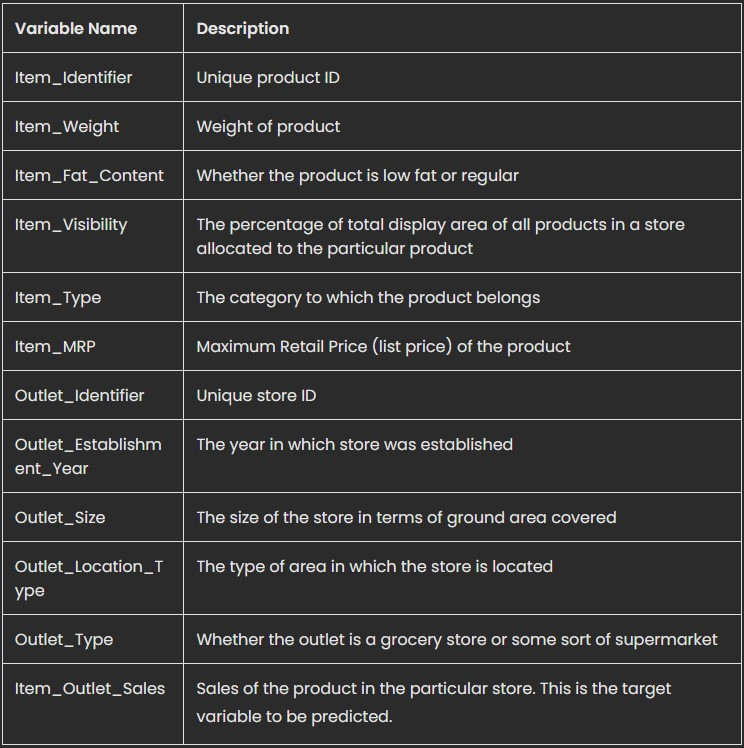

## Clean Data

In [6]:
# The .shape attribute returns the number of rows and columns in the DataFrame.

df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 8523 rows and 12 columns.


- To start, some columns are renamed for clarity.

In [7]:
# A dictionary is created to rename certain columns.
# Old labels are keys and new labels are the corresponding values.

rename_dict = {'Item_Identifier': 'Item_ID',
               'Item_MRP': 'Maximum_Retail_Price',
               'Outlet_Location_Type': 'Location_Type'}

# The .rename() method passes the dictionary through. Axis=1 sets this to columns rather than rows.

df = df.rename(rename_dict, axis=1)
df.head()

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking for unnecessary columns

- Unique values are shown for each column.

In [8]:
# Unique values are called using the .nunique() method.
# This is stored in a new variable named unique_vals.

unique_vals = df.nunique()
unique_vals

Item_ID                      1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Maximum_Retail_Price         5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Location_Type                   3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- The percentage of unique values are calculated.

In [9]:
# The number of unique values is divided by the total rows in the DataFrame.
# The result is multiplied by 100 to create percentages.

unique_vals / len(df) * 100

Item_ID                      18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Maximum_Retail_Price         69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Location_Type                 0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

**Since there are no columns with 100% unique values, no columns are removed.**


### Checking for duplicated rows

In [10]:
# The .sum() method is used on the .duplicated() method to get the total amount of duplicated rows in the DataFrame.

df.duplicated().sum()

0

**Since there are no duplicated rows in the data set, no rows are removed.**

### Checking for column data types

In [11]:
# The attribute .dtypes shows only the column names and their data types.

df.dtypes

Item_ID                       object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Maximum_Retail_Price         float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Location_Type                 object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*Columns that require further inspection are 'Outlet_Location_Type' and 'Outlet_Type'.*

- <u>Outlet Location Type</u>, renamed 'Location_Type', is defined as "[t]he type of area in which the store is located".
  - Although the values could be reduced to their numerical value, this isn't appropriate for the data.

- <u>Outlet Type</u> is defined as "[w]hether the outlet is a grocery store or some sort of supermarket".
  - Again, although the values can be reduced to a numerical value, this isn't appropriate for the data.


**No column data types need to be adjusted.**
  - This section may be revisited after data exploration.

### Checking for consistent values

In [12]:
# The value counts from each column are pulled using a for loop.
# Each loop will get the value counts of a single column.

for col in df.columns:
  print(f'Value Counts for {col}:')
  print(df[col].value_counts ())
  print('\n')

Value Counts for Item_ID:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_ID, Length: 1559, dtype: int64


Value Counts for Item_Weight:
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Visibility:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy         

- We can see there are values in 'Item_Fat_Content' that can be renamed and merged.

In [13]:
# Values in 'Item_Fat_Content' are renamed using the .replace() method with a short dictionary inserted.
# Value counts are called again to see the new results.

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Object values are now consistent.**

### Checking for null values

In [14]:
# A null value count is pulled from the data set using the .isna() method.
# The .sum() method is used to call the total null value counts.

df.isna().sum()

Item_ID                         0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Maximum_Retail_Price            0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Location_Type                   0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

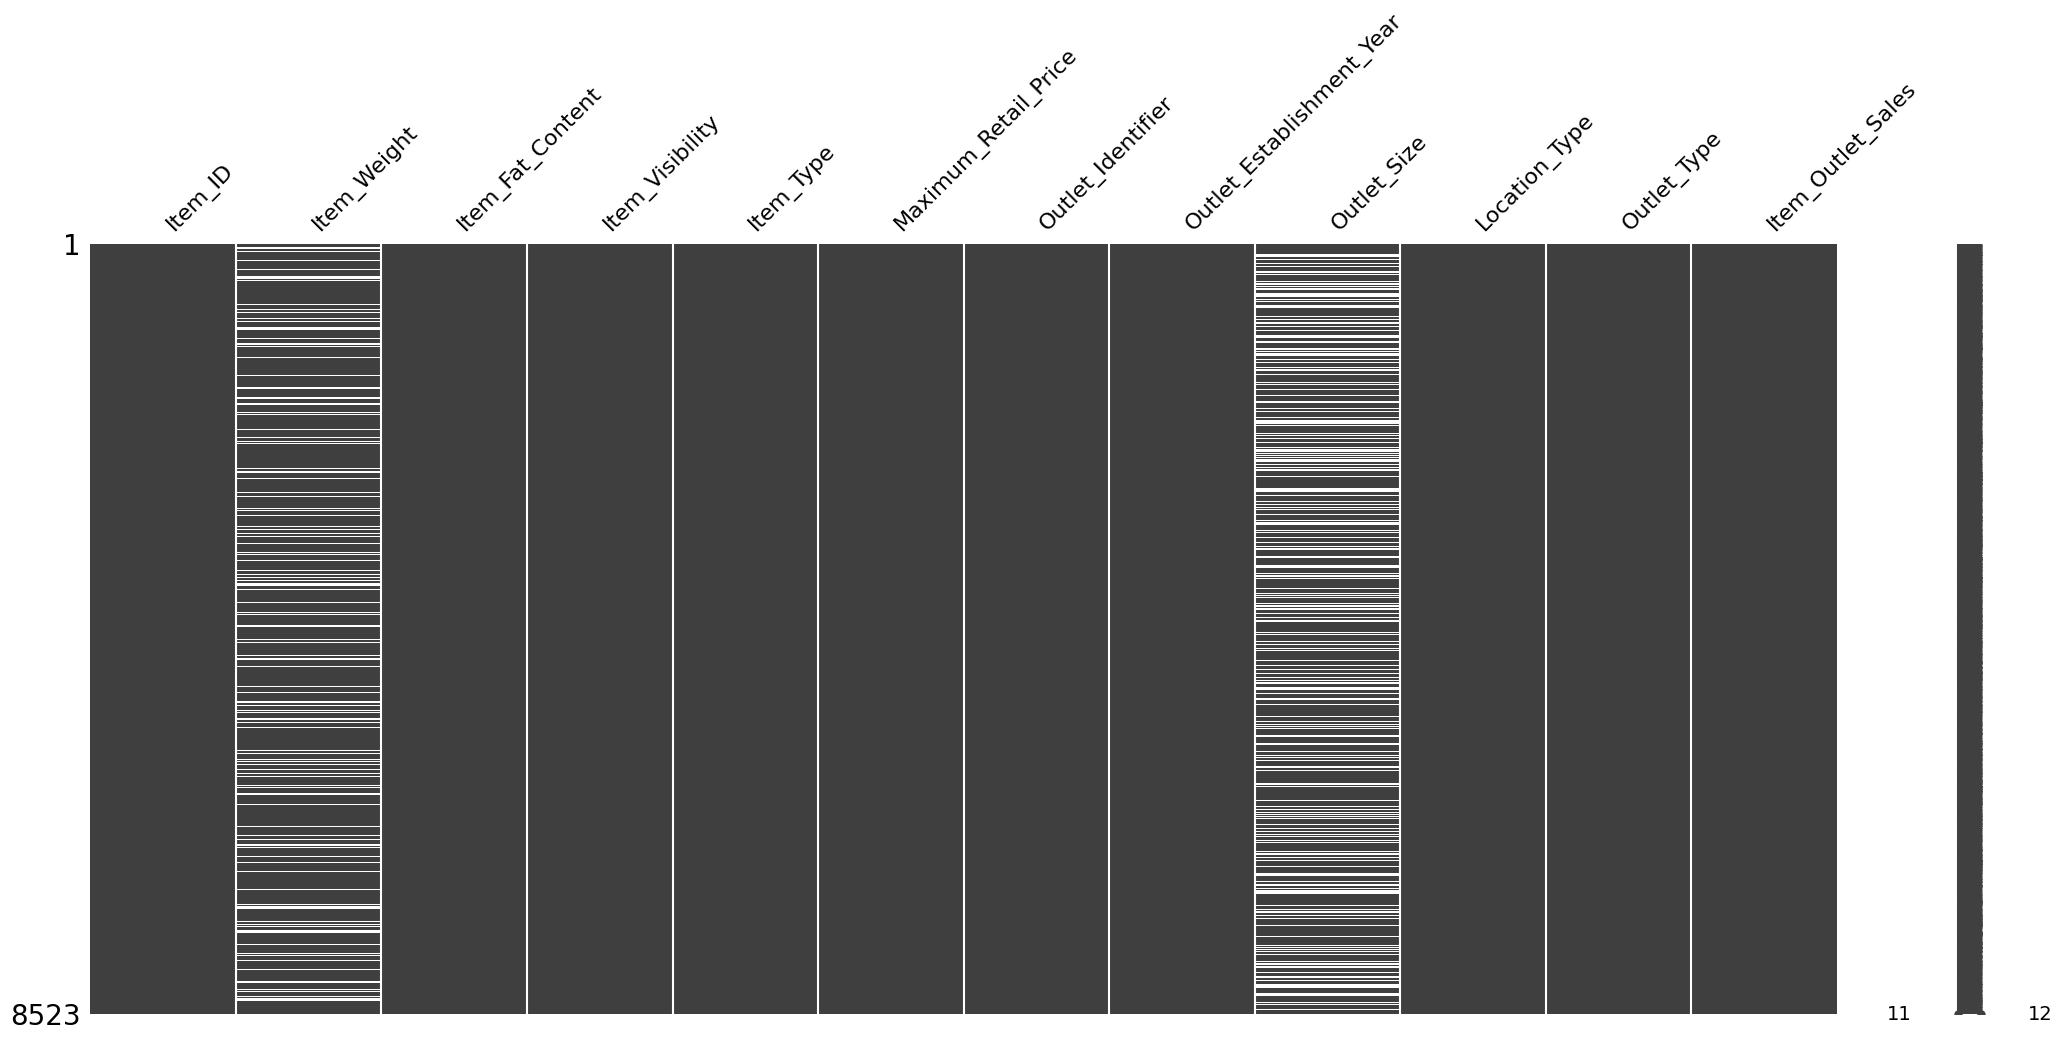

In [15]:
# We will use missingno to visualize null values in the data set.

msno.matrix(df);

#### Replacing object-type null values

In [16]:
# Since 'Outlet_Size' is an object-type Series, null values are replaced with the term 'MISSING'.
# The .fillna() method is used passing 'MISSING' as an argument to fill the null values.
# This method is used specifically on the column 'Outlet_Size'.

df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

# The null value total count is called again.

out_size_null = df['Outlet_Size'].isna().sum()
print(f"There are now {out_size_null} null values in the column, 'Outlet_Size'.")

There are now 0 null values in the column, 'Outlet_Size'.


In [17]:
# Now, 'MISSING' is a new value.

df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

**Object-type null values have been filled.**

#### Replacing numerical-type null values

- Next, null values in 'Item_Weight' must be replaced.
  - The head and tail of the data set show that each 'Item_ID' value has the same 'Item_Weight' value.
  - To fill the null values, a dictionary will be created.
  - Known 'Item_ID' values and their corresponding 'Item_Weight' values will be the keys and values of the dictionary.

In [18]:
# First, null values from 'Item_Weight' are stored in the variable null_weight.
null_weight = df['Item_Weight'].isna()

# Then, another variable (weight_nulls_gone) stores the DataFrame where null_weight is False.
weight_nulls_gone = df[null_weight == False]

# The new DataFrame only shows non-null values.
weight_nulls_gone

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
# From this variable, duplicates of 'Item_ID' values are dropped.

weight_nulls_gone = weight_nulls_gone.drop_duplicates(subset='Item_ID')
weight_nulls_gone

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
7298,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388
7373,FDS09,8.895,Regular,0.081547,Snack Foods,49.8008,OUT017,2007,MISSING,Tier 2,Supermarket Type1,759.0120
7421,FDU43,19.350,Regular,0.000000,Fruits and Vegetables,238.6564,OUT013,1987,High,Tier 3,Supermarket Type1,3575.3460
7944,FDO49,10.600,Regular,0.033052,Breakfast,49.7008,OUT046,1997,Small,Tier 1,Supermarket Type1,961.4152


In [20]:
# The 'Item_ID' and 'Item_Weight' columns are transformed into lists.
# These lists are stored in separate variables.

id_list = list(weight_nulls_gone['Item_ID'])
weight_list = list(weight_nulls_gone['Item_Weight'])

In [21]:
# The lists are zipped together in order of future keys and values.
zipped_list = zip(id_list, weight_list)

# The zipped lists are turned into a dictionary.
id_weight_list = dict(zipped_list)

#The dictionary is printed to show the final result.
id_weight_list

{'FDA15': 9.3,
 'DRC01': 5.92,
 'FDN15': 17.5,
 'FDX07': 19.2,
 'NCD19': 8.93,
 'FDP36': 10.395,
 'FDO10': 13.65,
 'FDH17': 16.2,
 'FDU28': 19.2,
 'FDY07': 11.8,
 'FDA03': 18.5,
 'FDX32': 15.1,
 'FDS46': 17.6,
 'FDF32': 16.35,
 'FDP49': 9.0,
 'NCB42': 11.8,
 'FDU02': 13.35,
 'FDN22': 18.85,
 'NCB30': 14.6,
 'FDR28': 13.85,
 'NCD06': 13.0,
 'FDV10': 7.645,
 'DRJ59': 11.65,
 'FDE51': 5.925,
 'FDV38': 19.25,
 'NCS17': 18.6,
 'FDP33': 18.7,
 'FDO23': 17.85,
 'DRH01': 17.5,
 'NCX29': 10.0,
 'DRZ11': 8.85,
 'FDK43': 9.8,
 'FDA46': 13.6,
 'FDC02': 21.35,
 'FDL50': 12.15,
 'FDM39': 6.42,
 'NCP05': 19.6,
 'FDV49': 10.0,
 'FDL12': 15.85,
 'NCL17': 7.39,
 'FDM40': 10.195,
 'FDR13': 9.895,
 'FDA43': 10.895,
 'NCP18': 12.15,
 'FDK21': 7.905,
 'NCX54': 9.195,
 'DRK35': 8.365,
 'FDY21': 15.1,
 'FDM20': 10.0,
 'FDV27': 7.97,
 'FDC46': 17.7,
 'FDH19': 19.35,
 'FDZ03': 13.65,
 'DRH37': 17.6,
 'NCI17': 8.645,
 'FDJ58': 15.6,
 'FDH35': 18.25,
 'FDG02': 7.855,
 'NCZ18': 7.825,
 'FDC29': 8.39,
 'FDQ10': 12.

In [22]:
"""
The original 'Item_Weight' Series' nulls are filled using the .map() method [as shown by jezrael on Stack Overflow:
 https://stackoverflow.com/questions/71205742/filling-empty-rows-with-dictionary-values-via-for-loop-pandas

.map() produces a new object which iterates through each given value and performs a certain task.

First we are calling 'Item_Weight' in the DataFrame.
Then, we are telling it to fill null values using .fillna().
We pass as an argument the .map() method applied to the column 'Item_ID'.
For each key in the dictionary id_weight_list found in Item_ID, it will fill null values in 'Item_Weight' with the corresponding value.
"""

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_ID'].map(id_weight_list))

# By pulling the DataFrame's columns 'Item_ID' and 'Item_Weight' while sorting by 'Item_ID', we can see that the occasional null values have now been filled.

df[['Item_ID', 'Item_Weight']].sort_values('Item_ID')

,Item_ID,Item_Weight
8043,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
1197,DRA12,11.60
1245,DRA12,11.60
...,...,...
7926,NCZ54,14.65
214,NCZ54,14.65
1896,NCZ54,14.65
7166,NCZ54,14.65


- The remaining null values are pulled.

In [23]:
weight_null_remaining = df['Item_Weight'].isna().sum()
print(f"There are now {weight_null_remaining} null values in the column, 'Item_Weight'.")

There are now 4 null values in the column, 'Item_Weight'.


- Because there are only four null values remaining, we can assume there are no corresponding values in the data set.
- After viewing the remaining null values within the data frame, we can fill the remaining nulls with improbable numerical placeholders.

In [24]:
remaining_weight_nulls = df.isna().any(axis=1)
df[remaining_weight_nulls]

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [25]:
# The null values remaining (4) are divided by the total length of the DataFrame
# and multiplied by 100 to get the percentage of total null values

weight_null_remaining / len(df) * 100

0.04693183151472486

- Because there is such a small percentage of rows with null values, these rows are dropped from the data set.

In [26]:
# The method .dropna() is used to drop all rows with null values.
# The argument inplace=True applies this change to the DataFrame.

df.dropna(inplace=True)
weight_null_remaining = df['Item_Weight'].isna().sum()

print(f"There are now {weight_null_remaining} null values in the column, 'Item_Weight'.")

There are now 0 null values in the column, 'Item_Weight'.


- The data set is checked one more time for any remaining null values.

In [27]:
df.isna().sum()

Item_ID                      0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Maximum_Retail_Price         0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Location_Type                0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**All null values have been addressed.**

### Creating summaries for numerical columns

In [28]:
# .describe() is used on numerical columns in the DataFrame.
# A DataFrame is shown with the statistical summary of each column.

df.describe(include='number')

,Item_Weight,Item_Visibility,Maximum_Retail_Price,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
df.describe(exclude='number')

,Item_ID,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Location_Type,Outlet_Type
count,8519,8519,8519,8519,8519,8519,8519
unique,1555,2,16,10,4,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,10,5516,1232,932,2790,3347,5577


- The cleaned data set is saved as a new csv.

In [30]:
#A new path is written and stored in fpath_out.
fpath_out = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/cleaned-data-cleaning-core.csv"

# The file is saved in the new path using the .to_csv method.
#Index is set to False because a new index is not needed for the DataFrame.

df.to_csv(fpath_out, index=False)

In [31]:
# The new DataFrame is loaded to preview for any unexpected changes.

clean_df = pd.read_csv(fpath_out)
clean_df.head()

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [75]:
images_dir = '/content/drive/MyDrive/CodingDojo/Images'

### Setting the style

In [33]:
# Matplotlib and Seaborn are imported to easily create visualizations.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [34]:
# We use Seaborn's .set_context() function to adjust all subsequent visualizations
# for legibility within the Github repository.
# 'notebook' is used for the Google Colaboratory format.

sns.set_context('notebook', font_scale=1.5)

# The attribute .style is used with the method .use()
# to set the style of all graphs created henceforth.

plt.style.use(['fivethirtyeight'])

### Histograms showing distributions of:

#### Item visibility


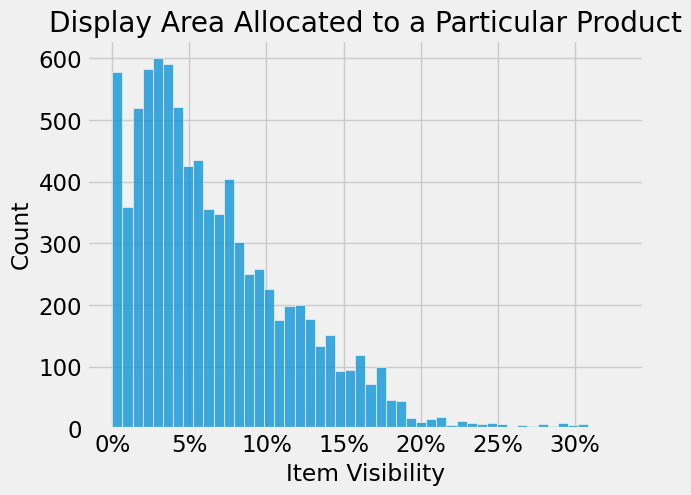

In [76]:
# The original values in 'Item_Visibility' are all decimals, although they represent percentages.
# To create a more legible graph, these percentages will be turned into whole value percentages.

# First, the values in 'Item_Visibility' are multiplied by 100 and stored in a new variable.

percent_ticks = df['Item_Visibility'] * 100

# Seaborn is used to create a histogram on a graph's axis, set to variable 'ax'
# using the function sns.histplot().
# The x-axis uses our new variable, percent_ticks.
fig, ax = plt.subplots()

ax = sns.histplot(data=df, x=percent_ticks)

# A function already exists to format ticks as percentages:
  # ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
# This function still shows decimal numbers, however.

# The code below references a comment on Stack Overflow showing how to use
# matplotlib.ticker to format tick labels as percentages.
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent

fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

# The method .set() is used to create an x-axis label, y-axis label, and title.

ax.set(xlabel='Item Visibility', ylabel='Count', title='Display Area Allocated to a Particular Product');

fig.savefig(f'{images_dir}/hist-item-vis-count.png', dpi=300)

#### Maximum retail prices of products

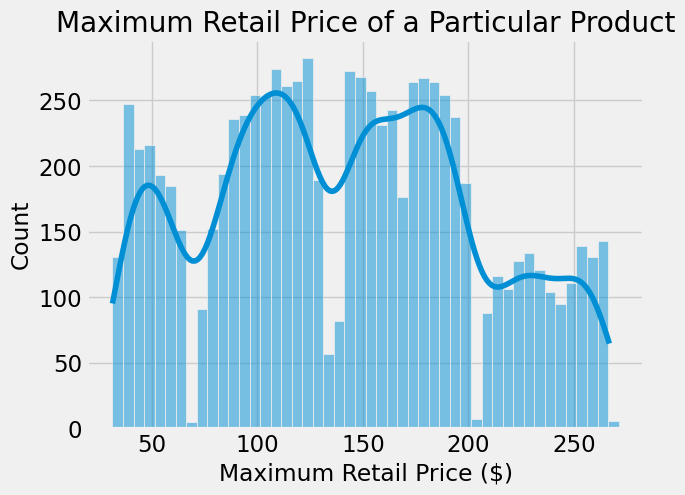

In [45]:
# Two new arguments are passed for this graph:
  # binwidth=5 changes the binwidth for a more appealing graph.
  # 'kde' stands for the kernel density estimate.
  # kde=True means a line is created to smooth distribution across the histogram.

# https://seaborn.pydata.org/generated/seaborn.histplot.html

ax = sns.histplot(data=df, x='Maximum_Retail_Price', binwidth=5, kde=True)

ax.set(xlabel='Maximum Retail Price ($)', ylabel='Count', title='Maximum Retail Price of a Particular Product');

#### Item sales

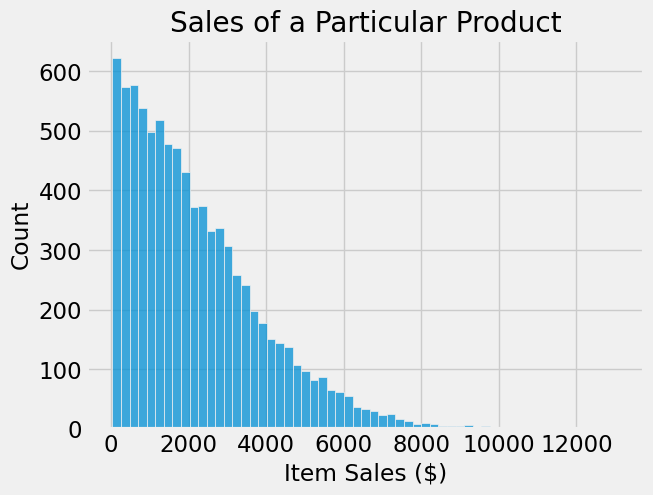

In [69]:
ax = sns.histplot(data=df, x='Item_Outlet_Sales')

ax.set(xlabel='Item Sales ($)', ylabel='Count', title='Sales of a Particular Product');

### Boxplots showing statistical summaries of:

#### Item visibility

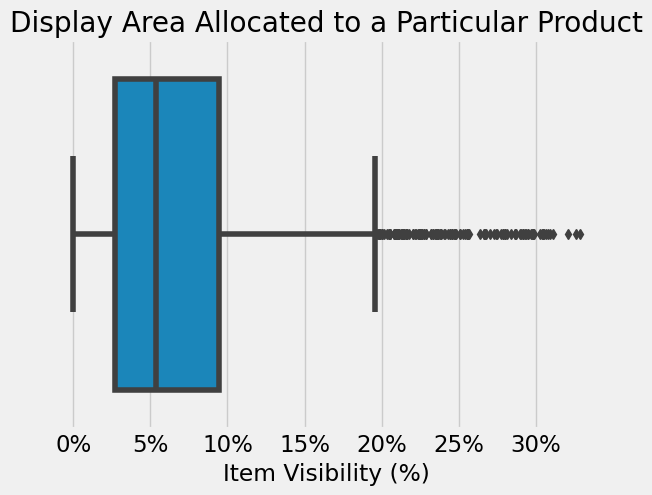

In [47]:
# A new Seaborn function is used to create a boxplot: sns.boxplot()

ax = sns.boxplot(data=df, x=percent_ticks)

ax.xaxis.set_major_formatter(xticks)

ax.set(xlabel='Item Visibility (%)', title='Display Area Allocated to a Particular Product');

#### Item sales

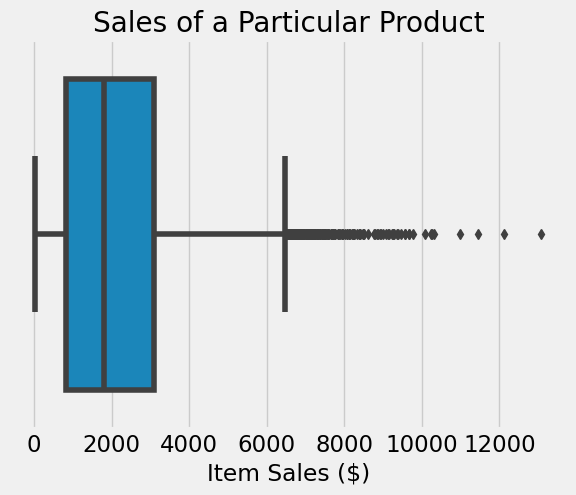

In [48]:
ax = sns.boxplot(data=df, x='Item_Outlet_Sales')

ax.set(xlabel='Item Sales ($)', title='Sales of a Particular Product');

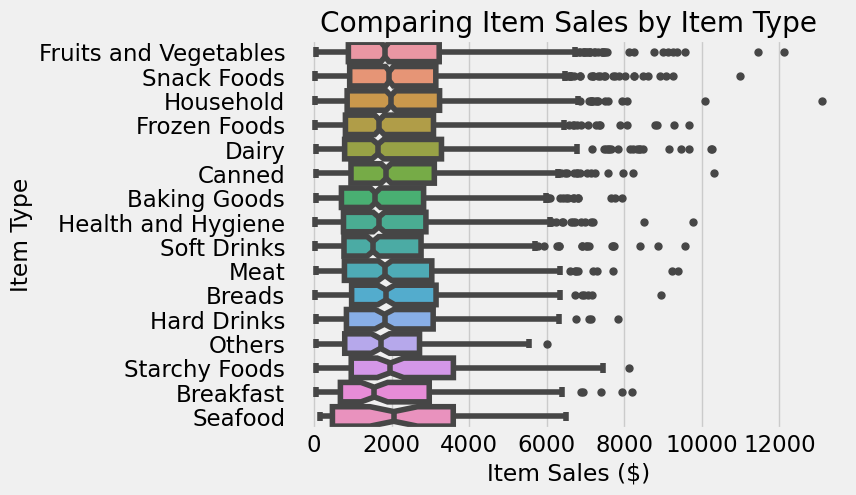

In [49]:
# A variable is created to sort and store the value counts of 'Item_Types.
# Variables are created for each categorical plot henceforth.
# It stores the value counts of the respective columns to be used as an index later.

item_val_count = df['Item_Type'].value_counts()

## https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Referencing the link above, arguments are passed within the .boxplot() function:
  # Notch marks at the median are created using notch=True.
  # Outlier markers are changed using a dictionary for flierprops.
# 'order' is set to the index of item_val_count.

ax = sns.boxplot(data=df, y='Item_Type', x='Item_Outlet_Sales',
                 order=item_val_count.index,
                 notch=True, flierprops={'marker': 'o'})

ax.set(ylabel = 'Item Type', xlabel='Item Sales ($)', title='Comparing Item Sales by Item Type');

### Bar plots showing the frequency of each value for:

#### Item fat content

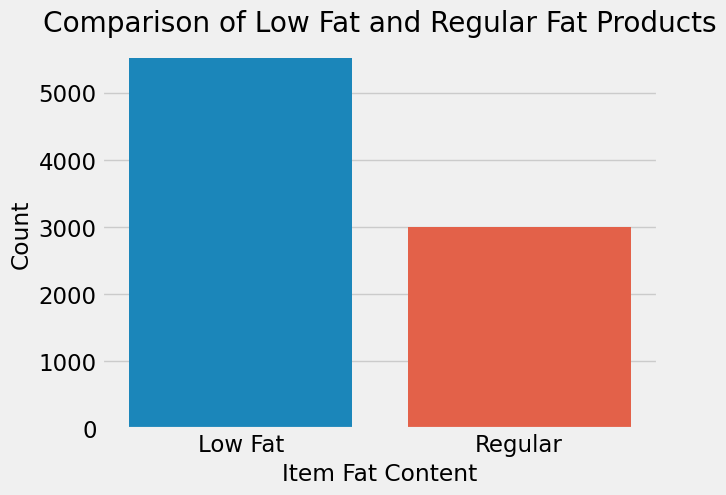

In [50]:
val_counts = df['Item_Fat_Content'].value_counts()

# The Seaborn .countplot() function is used to create a multivariate bar plot.
# order=val_counts.index sorts the order of bars from highest count to lowest on the graph.

ax = sns.countplot(data=df, x='Item_Fat_Content', order=val_counts.index)

ax.set(xlabel='Item Fat Content', ylabel='Count', title='Comparison of Low Fat and Regular Fat Products');

#### Item types

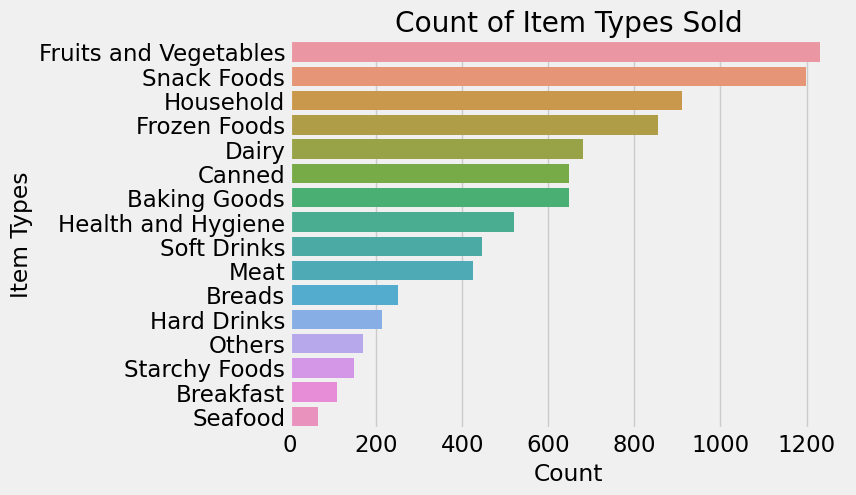

In [51]:
ax = sns.countplot(data=df, y='Item_Type', order=item_val_count.index)

ax.set(ylabel='Item Types', xlabel='Count', title='Count of Item Types Sold');

#### Outlet sizes

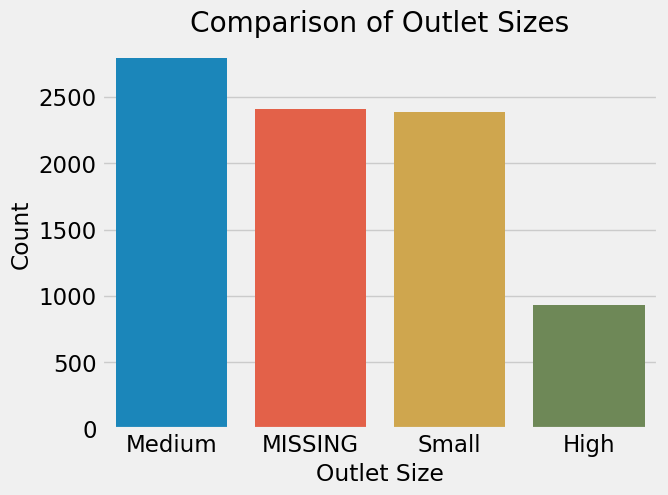

In [52]:
out_size_val_count = df['Outlet_Size'].value_counts()

ax = sns.countplot(data=df, x='Outlet_Size', order=out_size_val_count.index)

ax.set(xlabel='Outlet Size', ylabel='Count', title='Comparison of Outlet Sizes');

#### Outlet location types

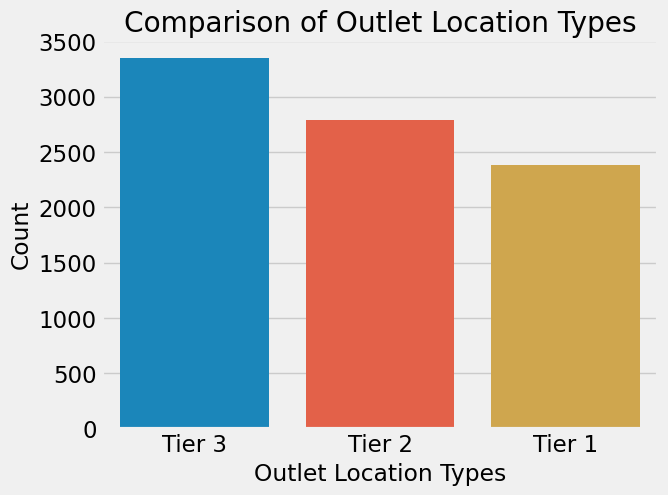

In [53]:
loc_type_val_count = df['Location_Type'].value_counts()

ax = sns.countplot(data=df, x='Location_Type', order=loc_type_val_count.index)

ax.set(xlabel='Outlet Location Types', ylabel='Count', title='Comparison of Outlet Location Types');

#### Outlet types

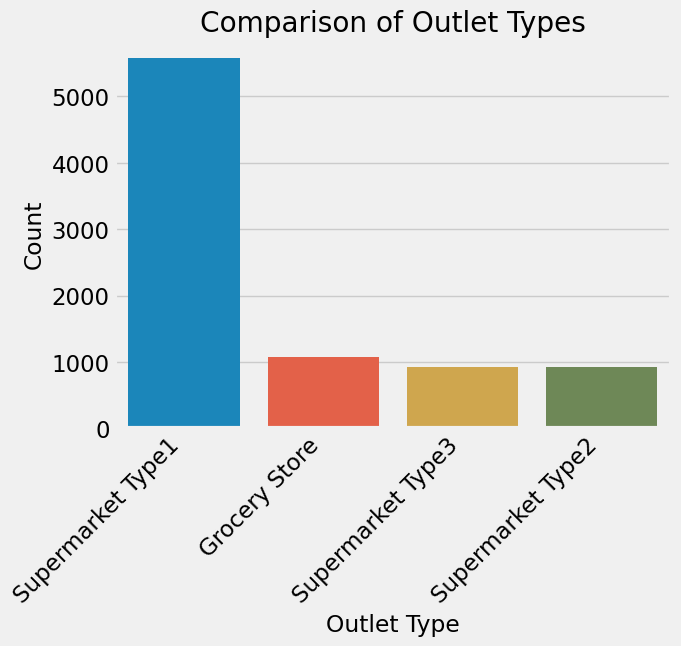

In [54]:
outlet_type_val_count = df['Outlet_Type'].value_counts()

ax = sns.countplot(data=df, x='Outlet_Type', order=outlet_type_val_count.index)

# The function .set_xticklabels() adjusts the tick labels on the x-axis.
  # .get_xticklabels() gets the x-axis tick labels as a list.
  # rotation=45 rotates the labels by 45 degrees so they do not overlap.
  # ha='right' horizontally aligns the labels to the right.

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Outlet Type', ylabel='Count', title='Comparison of Outlet Types');

### Correlations in the data set

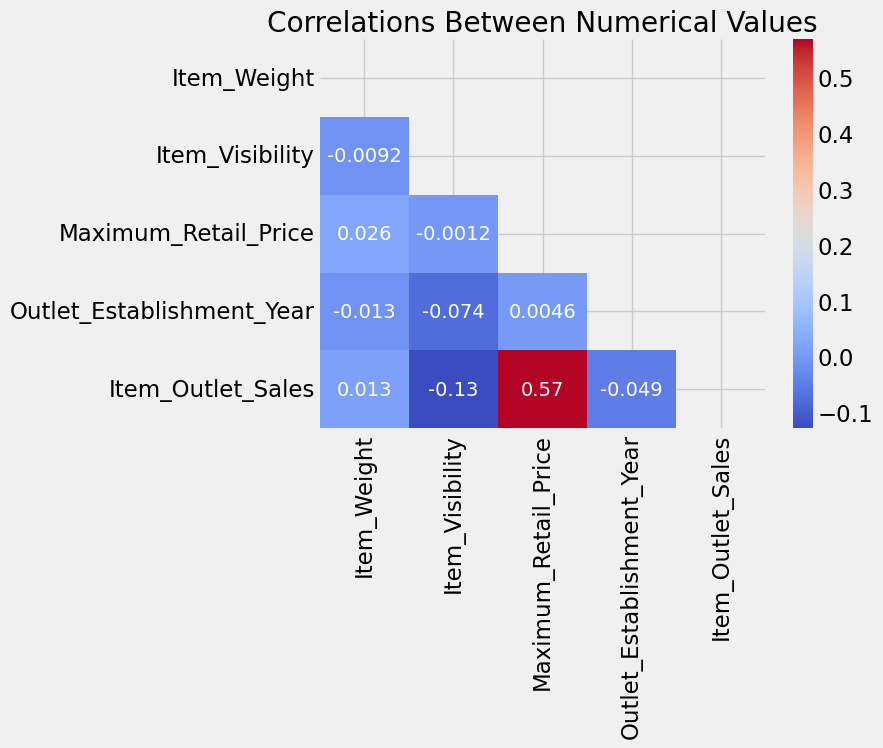

In [55]:
# A variable is created using the .corr() function.
# The .corr() function returns coefficients for correlations between two values.
# Since we are only comparing numerical values, we pass the argument numeric_only=True.
num_corr = df.corr(numeric_only = True)

# A mask is created using the .triu() method
# to cover duplicates, or "ones_like", of num_corr.
pairplot_mask = np.triu(np.ones_like(num_corr))

# The function subplots() is used to create a figure and axes in which the correlation map is held.
# This is stored within fig, ax (figure, axes).
fig, ax = plt.subplots()

# The Seaborn function .heatmap() is used to create a map of coefficients
# based on the num_corr data.
  # cmap='coolwarm' adjusts the color scheme.
  # annot=True will label each cell with a coefficient.
  # mask=pairplot_mask creates a mask using the previous variable.

sns.heatmap(num_corr, cmap= 'coolwarm', annot= True, mask=pairplot_mask)

ax.set_title('Correlations Between Numerical Values');

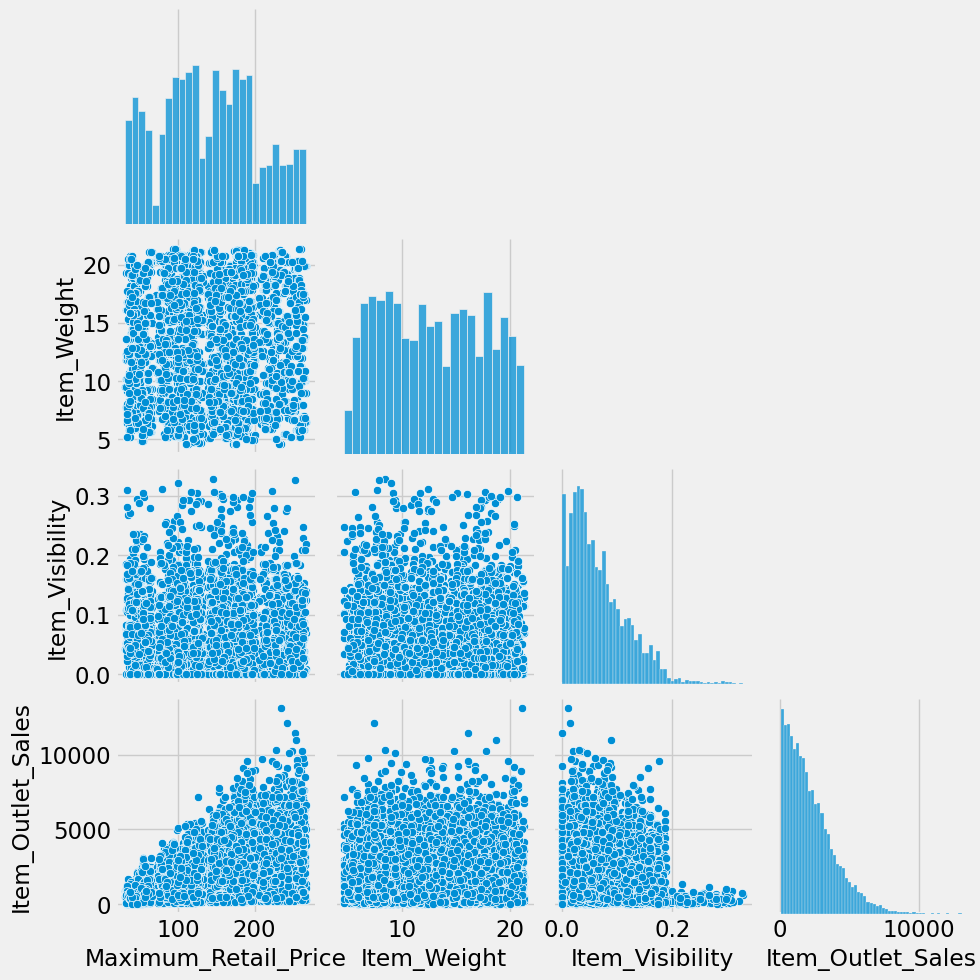

In [56]:
# The Seaborn method .pairplot() is used to create a grid of histograms and scatter plots
# comparing numerical values.
  # corner=True masks the duplicate graphs.

ax = sns.pairplot(data=df, vars=['Maximum_Retail_Price', 'Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales'], corner=True);

#### Scatter plots showing the correlation between:

##### Maximum retail price and Item sales

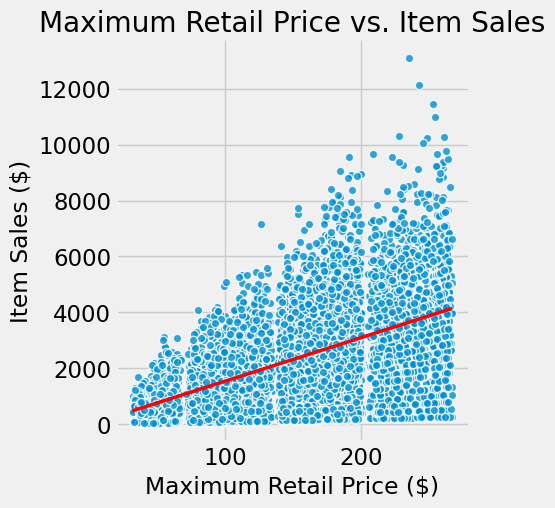

In [57]:
# scatter_kws stores a dictionary which sets 'edgecolor' to white.
# This will be used to clearly distinguish the many points on a scatterplot.
scatter_kws = dict(edgecolor='white')

# The Seaborn method .lmplot() is used to create a scatterplot of the data.
# scatter_kws=scatter_kws creates a white outline around each point on the plot.
# line_kws changes the appearance of the regression fit line via a dictionary.
  # 'color' changes the color.
  # 'lw' adjusts the line weight based on the value given.

ax = sns.lmplot(data=df, x='Maximum_Retail_Price', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws={'color':'red', 'lw':2.5})
ax.set(xlabel= 'Maximum Retail Price ($)', ylabel= 'Item Sales ($)', title='Maximum Retail Price vs. Item Sales');

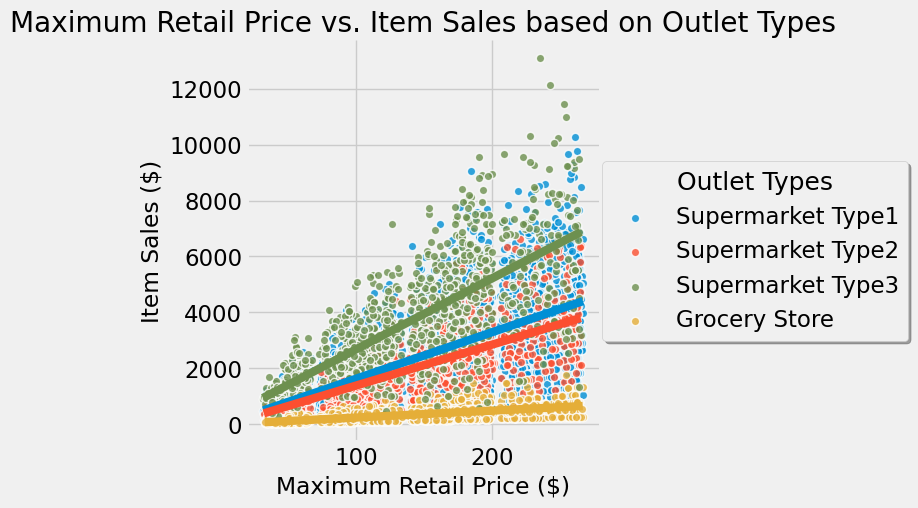

In [58]:
ax = sns.lmplot(data=df, x='Maximum_Retail_Price', y='Item_Outlet_Sales', scatter_kws=scatter_kws, hue='Outlet_Type', legend=False)
# The legend is removed in order to create a new one.

ax.set(xlabel= 'Maximum Retail Price ($)', ylabel= 'Item Sales ($)', title='Maximum Retail Price vs. Item Sales based on Outlet Types')

# The order of the labels in the legend were originally out of order.
# The labels in the legend are reorganized referencing the code in the link below:
  # https://www.statology.org/matplotlib-legend-order/

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           # The location of the legend is set using coordinates.
           # A shadow is added to the legend.
           # The legend is retitled to remove the underscore.
           loc=(1.01, 0.25), shadow=True, title='Outlet Types')

plt.show();

##### Item visibility and Item sales

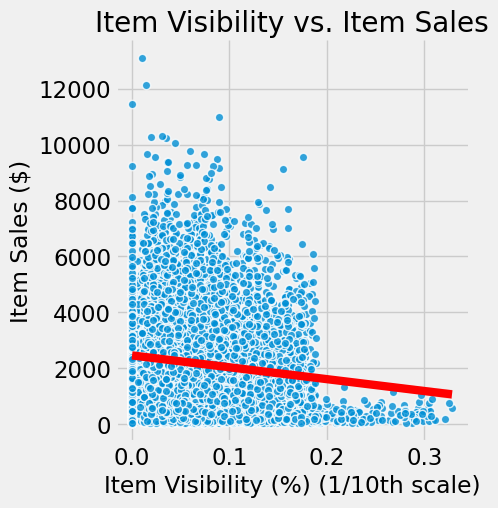

In [59]:
ax = sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws={'color':'red'})
ax.set(xlabel= 'Item Visibility (%) (1/10th scale)', ylabel= 'Item Sales ($)', title='Item Visibility vs. Item Sales');

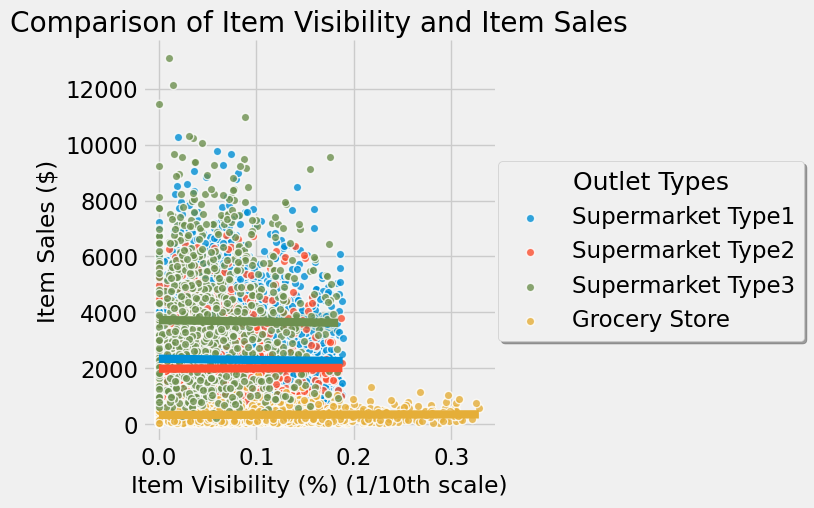

In [60]:
ax = sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', scatter_kws=scatter_kws, hue='Outlet_Type', legend=False)
ax.set(xlabel= 'Item Visibility (%) (1/10th scale)', ylabel= 'Item Sales ($)', title='Comparison of Item Visibility and Item Sales')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=(1.01, 0.25), shadow=True, title='Outlet Types')

plt.show();

### Comparisons of graphs

#### Item visibility

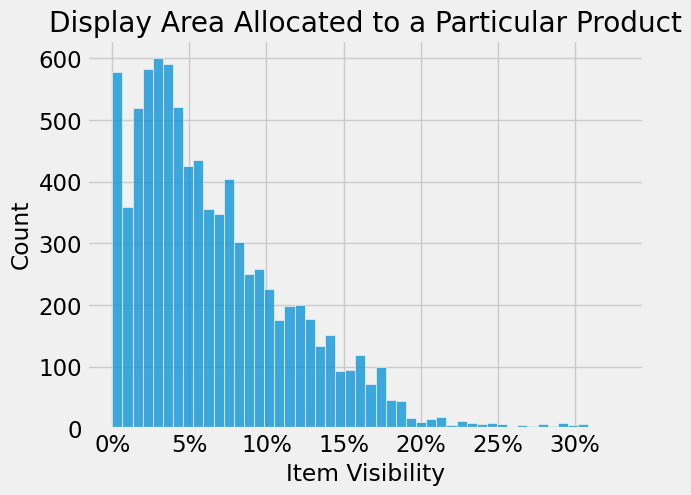

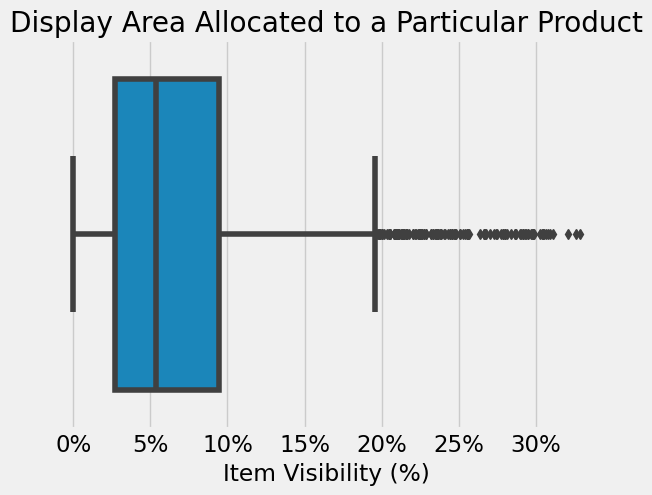

#### Item sales

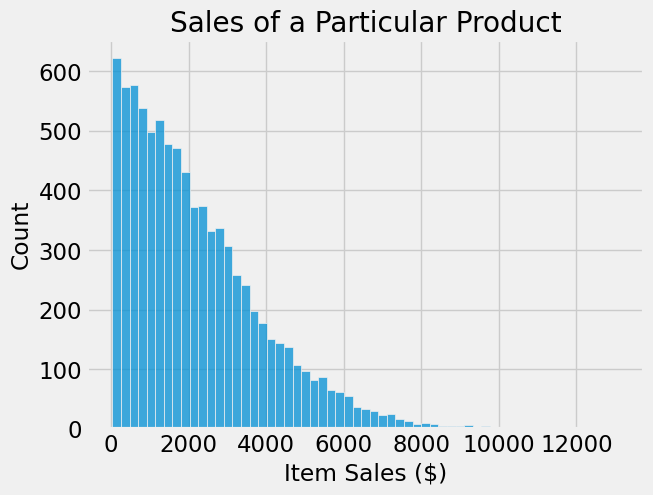

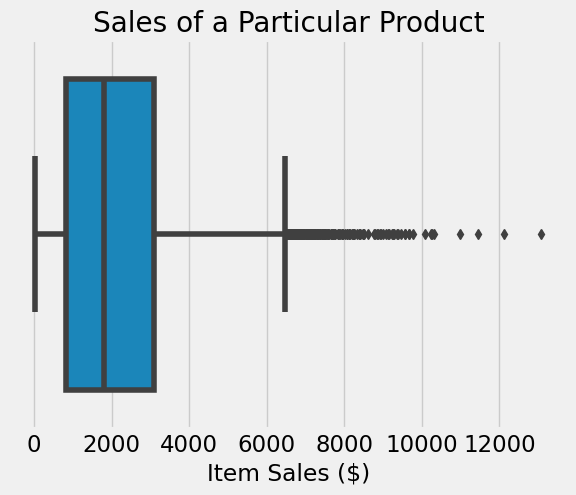

#### Item types sold

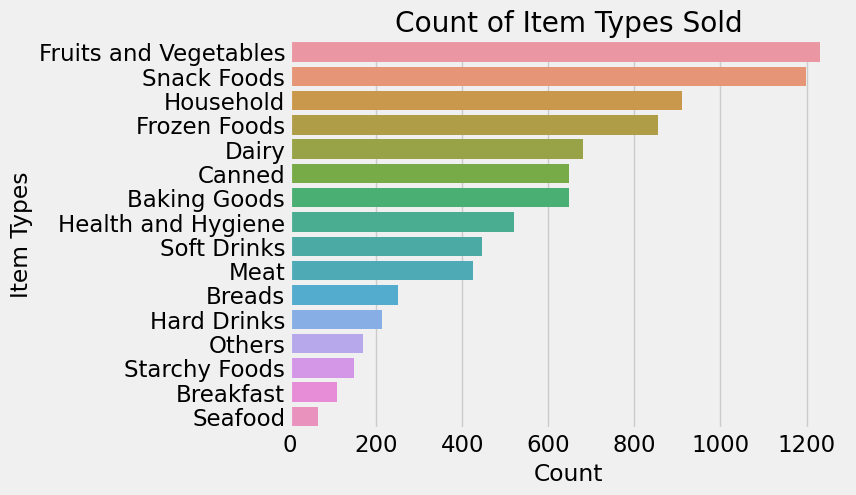

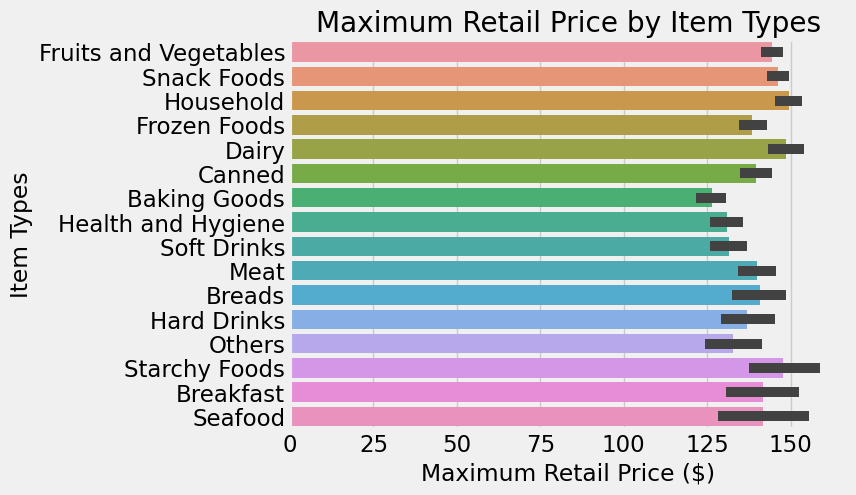

## Explanatory Data Analysis